In [9]:
"""
========================================================================
HOTEL REVENUE ANALYTICS - DATA PREPARATION
========================================================================
Junior BI Analyst Portfolio Project
Author: Berke Ilgun

Purpose: Clean and prepare hotel booking data for analysis
Skills: Data cleaning, Pandas, Data quality checks
========================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Simple plot settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("=" * 70)
print("🏨 HOTEL REVENUE ANALYTICS - DATA PREPARATION")
print("=" * 70)
print("\n✅ Starting data cleaning process...\n")

🏨 HOTEL REVENUE ANALYTICS - DATA PREPARATION

✅ Starting data cleaning process...



In [10]:
# ========================================================================
# STEP 1: LOAD DATA
# ========================================================================
print("📥 STEP 1: Loading hotel booking data...")

# Load the Kaggle dataset
df = pd.read_csv('../data/hotel_bookings.csv')

print(f"✅ Loaded {len(df):,} bookings")
print(f"   Columns: {len(df.columns)}")
print(f"   Date range: {df['arrival_date_year'].min()} - {df['arrival_date_year'].max()}")

# Show first few rows
print("\n👀 Preview of data:")
df.head()

📥 STEP 1: Loading hotel booking data...
✅ Loaded 119,390 bookings
   Columns: 32
   Date range: 2015 - 2017

👀 Preview of data:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
# ========================================================================
# STEP 2: BASIC DATA QUALITY CHECKS
# ========================================================================
print("🔍 STEP 2: Checking data quality...")
print("=" * 70)

# Check dataset shape
print(f"\n📊 Dataset Shape:")
print(f"   Rows: {df.shape[0]:,}")
print(f"   Columns: {df.shape[1]}")

# Check for missing values
print(f"\n⚠️  Missing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    missing_df = pd.DataFrame({
        'Column': missing[missing > 0].index,
        'Missing_Count': missing[missing > 0].values,
        'Percentage': (missing[missing > 0].values / len(df) * 100).round(2)
    })
    print(missing_df.to_string(index=False))
else:
    print("   ✅ No missing values!")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate rows: {duplicates}")

# Check data types
print(f"\n📋 Data Types:")
print(df.dtypes.value_counts())

🔍 STEP 2: Checking data quality...

📊 Dataset Shape:
   Rows: 119,390
   Columns: 32

⚠️  Missing Values:
  Column  Missing_Count  Percentage
children              4        0.00
 country            488        0.41
   agent          16340       13.69
 company         112593       94.31

🔄 Duplicate rows: 31994

📋 Data Types:
int64      16
object     12
float64     4
Name: count, dtype: int64


In [12]:
# ========================================================================
# STEP 3: EXPLORE KEY COLUMNS
# ========================================================================
print("\n📊 STEP 3: Exploring key columns...")
print("=" * 70)

print("\n🏨 Hotel Types:")
print(df['hotel'].value_counts())

print("\n👥 Market Segments:")
print(df['market_segment'].value_counts())

print("\n💰 ADR (Average Daily Rate) Statistics:")
print(df['adr'].describe())

print("\n🚫 Cancellation Rate:")
cancel_rate = (df['is_canceled'].sum() / len(df)) * 100
print(f"   Cancelled: {df['is_canceled'].sum():,} ({cancel_rate:.1f}%)")
print(f"   Completed: {(df['is_canceled'] == 0).sum():,} ({100-cancel_rate:.1f}%)")


📊 STEP 3: Exploring key columns...

🏨 Hotel Types:
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

👥 Market Segments:
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

💰 ADR (Average Daily Rate) Statistics:
count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

🚫 Cancellation Rate:
   Cancelled: 44,224 (37.0%)
   Completed: 75,166 (63.0%)


In [13]:
# ========================================================================
# STEP 4: CLEAN MISSING VALUES
# ========================================================================
print("\n🧹 STEP 4: Cleaning missing values...")
print("=" * 70)

original_rows = len(df)

# Fill missing children with 0 (no children)
if 'children' in df.columns:
    missing_children = df['children'].isnull().sum()
    df['children'].fillna(0, inplace=True)
    print(f"✅ Filled {missing_children:,} missing 'children' values with 0")

# Fill missing agent with 0 (no agent)
if 'agent' in df.columns:
    missing_agent = df['agent'].isnull().sum()
    df['agent'].fillna(0, inplace=True)
    print(f"✅ Filled {missing_agent:,} missing 'agent' values with 0")

# Fill missing company with 0 (no company)
if 'company' in df.columns:
    missing_company = df['company'].isnull().sum()
    df['company'].fillna(0, inplace=True)
    print(f"✅ Filled {missing_company:,} missing 'company' values with 0")

# Keep country as missing (optional field)
missing_country = df['country'].isnull().sum()
print(f"⚠️  Keeping {missing_country:,} missing 'country' values")

print(f"\n📊 Rows after cleaning: {len(df):,} (no rows removed)")


🧹 STEP 4: Cleaning missing values...
✅ Filled 4 missing 'children' values with 0
✅ Filled 16,340 missing 'agent' values with 0
✅ Filled 112,593 missing 'company' values with 0
⚠️  Keeping 488 missing 'country' values

📊 Rows after cleaning: 119,390 (no rows removed)


In [14]:
# ========================================================================
# STEP 5: REMOVE INVALID VALUES
# ========================================================================
print("\n🧹 STEP 5: Removing invalid values...")
print("=" * 70)

# Check ADR issues
print(f"\n💰 ADR (Price) Issues:")
print(f"   Negative ADR: {(df['adr'] < 0).sum()}")
print(f"   Zero ADR: {(df['adr'] == 0).sum()}")
print(f"   Extremely high ADR (>1000): {(df['adr'] > 1000).sum()}")

# Remove negative prices (data errors)
before = len(df)
df = df[df['adr'] >= 0]
removed_negative = before - len(df)
print(f"\n✅ Removed {removed_negative:,} bookings with negative prices")

# Remove extreme outliers (likely errors)
before = len(df)
df = df[df['adr'] <= 500]
removed_extreme = before - len(df)
print(f"✅ Removed {removed_extreme:,} bookings with ADR > €500")

# Keep zero ADR (complimentary stays)
zero_adr = (df['adr'] == 0).sum()
print(f"⚠️  Keeping {zero_adr:,} bookings with €0 ADR (complimentary stays)")

print(f"\n📊 Remaining bookings: {len(df):,}")


🧹 STEP 5: Removing invalid values...

💰 ADR (Price) Issues:
   Negative ADR: 1
   Zero ADR: 1959
   Extremely high ADR (>1000): 1

✅ Removed 1 bookings with negative prices
✅ Removed 3 bookings with ADR > €500
⚠️  Keeping 1,959 bookings with €0 ADR (complimentary stays)

📊 Remaining bookings: 119,386


In [15]:
# ========================================================================
# STEP 6: FILTER TO RELEVANT DATE RANGE
# ========================================================================
print("\n📅 STEP 6: Filtering to relevant dates...")
print("=" * 70)

print(f"Original date range: {df['arrival_date_year'].min()} - {df['arrival_date_year'].max()}")

# Keep only 2016-2017 (most complete years)
before = len(df)
df = df[df['arrival_date_year'].isin([2016, 2017])]
removed = before - len(df)

print(f"✅ Filtered to 2016-2017")
print(f"   Removed: {removed:,} bookings from other years")
print(f"   Remaining: {len(df):,} bookings")


📅 STEP 6: Filtering to relevant dates...
Original date range: 2015 - 2017
✅ Filtered to 2016-2017
   Removed: 21,995 bookings from other years
   Remaining: 97,391 bookings


In [16]:
# ========================================================================
# STEP 7: CREATE USEFUL COLUMNS
# ========================================================================
print("\n⚙️  STEP 7: Creating new columns for analysis...")
print("=" * 70)

# Total nights stayed
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
print(f"✅ Created 'total_nights' (avg: {df['total_nights'].mean():.1f} nights)")

# Total guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print(f"✅ Created 'total_guests' (avg: {df['total_guests'].mean():.1f} guests)")

# Total revenue (only for completed bookings)
df['total_revenue'] = np.where(
    df['is_canceled'] == 0,
    df['adr'] * df['total_nights'],
    0
)
print(f"✅ Created 'total_revenue' (total: €{df['total_revenue'].sum():,.2f})")

# Create month number mapping
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_month_num'] = df['arrival_date_month'].map(month_map)
print(f"✅ Created 'arrival_month_num'")

# Create full date column
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' + 
    df['arrival_month_num'].astype(str) + '-' + 
    df['arrival_date_day_of_month'].astype(str)
)
print(f"✅ Created 'arrival_date' (range: {df['arrival_date'].min().date()} to {df['arrival_date'].max().date()})")

# Weekend flag
df['is_weekend'] = (df['arrival_date'].dt.dayofweek >= 5).astype(int)
weekend_pct = (df['is_weekend'].sum() / len(df)) * 100
print(f"✅ Created 'is_weekend' ({weekend_pct:.1f}% are weekend arrivals)")

print(f"\n📊 Total new columns created: 5")


⚙️  STEP 7: Creating new columns for analysis...
✅ Created 'total_nights' (avg: 3.4 nights)
✅ Created 'total_guests' (avg: 2.0 guests)
✅ Created 'total_revenue' (total: €21,484,255.10)
✅ Created 'arrival_month_num'
✅ Created 'arrival_date' (range: 2016-01-01 to 2017-08-31)
✅ Created 'is_weekend' (26.8% are weekend arrivals)

📊 Total new columns created: 5


In [17]:
# ========================================================================
# STEP 8: FINAL DATASET SUMMARY
# ========================================================================
print("\n📊 FINAL DATASET SUMMARY")
print("=" * 70)

print(f"\n📈 Overall Statistics:")
print(f"   Total Bookings: {len(df):,}")
print(f"   Completed: {(df['is_canceled'] == 0).sum():,} ({(df['is_canceled'] == 0).mean()*100:.1f}%)")
print(f"   Cancelled: {df['is_canceled'].sum():,} ({df['is_canceled'].mean()*100:.1f}%)")

print(f"\n💰 Revenue Metrics:")
print(f"   Total Revenue: €{df['total_revenue'].sum():,.2f}")
print(f"   Average ADR: €{df[df['is_canceled'] == 0]['adr'].mean():.2f}")
print(f"   Average Booking Value: €{df[df['is_canceled'] == 0]['total_revenue'].mean():.2f}")

print(f"\n📅 Stay Metrics:")
print(f"   Average Length of Stay: {df['total_nights'].mean():.1f} nights")
print(f"   Average Guests per Booking: {df['total_guests'].mean():.1f}")

print(f"\n📋 Dataset Dimensions:")
print(f"   Rows: {df.shape[0]:,}")
print(f"   Columns: {df.shape[1]}")

# List all columns
print(f"\n📝 All Columns:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")


📊 FINAL DATASET SUMMARY

📈 Overall Statistics:
   Total Bookings: 97,391
   Completed: 61,310 (63.0%)
   Cancelled: 36,081 (37.0%)

💰 Revenue Metrics:
   Total Revenue: €21,484,255.10
   Average ADR: €102.53
   Average Booking Value: €350.42

📅 Stay Metrics:
   Average Length of Stay: 3.4 nights
   Average Guests per Booking: 2.0

📋 Dataset Dimensions:
   Rows: 97,391
   Columns: 38

📝 All Columns:
    1. hotel
    2. is_canceled
    3. lead_time
    4. arrival_date_year
    5. arrival_date_month
    6. arrival_date_week_number
    7. arrival_date_day_of_month
    8. stays_in_weekend_nights
    9. stays_in_week_nights
   10. adults
   11. children
   12. babies
   13. meal
   14. country
   15. market_segment
   16. distribution_channel
   17. is_repeated_guest
   18. previous_cancellations
   19. previous_bookings_not_canceled
   20. reserved_room_type
   21. assigned_room_type
   22. booking_changes
   23. deposit_type
   24. agent
   25. company
   26. days_in_waiting_list
   27. c


📊 Creating visualizations...


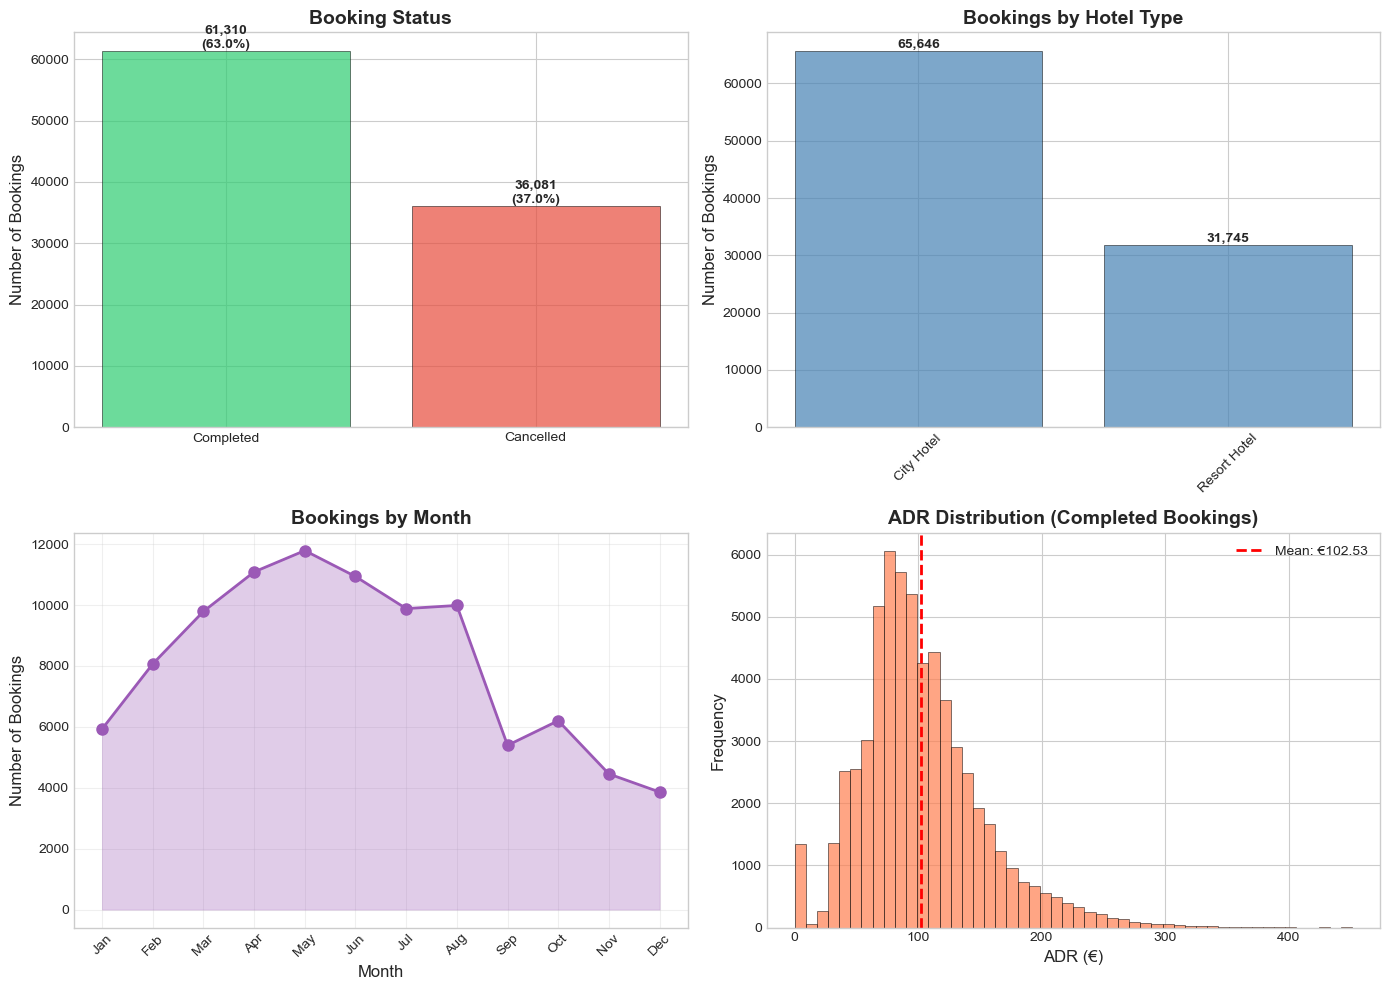

✅ Visualizations complete!


In [18]:
# ========================================================================
# STEP 9: QUICK VISUALIZATIONS
# ========================================================================
print("\n📊 Creating visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Booking Status
status_counts = df['is_canceled'].value_counts()
colors = ['#2ecc71', '#e74c3c']
axes[0, 0].bar(['Completed', 'Cancelled'], status_counts, color=colors, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Booking Status', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Number of Bookings')
# Add value labels
for i, v in enumerate(status_counts):
    axes[0, 0].text(i, v, f'{v:,}\n({v/len(df)*100:.1f}%)', 
                    ha='center', va='bottom', fontweight='bold')

# 2. Hotel Type Distribution
hotel_counts = df['hotel'].value_counts()
axes[0, 1].bar(hotel_counts.index, hotel_counts.values, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Bookings by Hotel Type', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Number of Bookings')
axes[0, 1].tick_params(axis='x', rotation=45)
# Add value labels
for i, v in enumerate(hotel_counts.values):
    axes[0, 1].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# 3. Monthly Bookings
monthly = df.groupby('arrival_month_num').size()
axes[1, 0].plot(monthly.index, monthly.values, marker='o', linewidth=2, 
               markersize=8, color='#9b59b6')
axes[1, 0].fill_between(monthly.index, monthly.values, alpha=0.3, color='#9b59b6')
axes[1, 0].set_title('Bookings by Month', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Bookings')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. ADR Distribution (completed bookings only)
completed_df = df[df['is_canceled'] == 0]
axes[1, 1].hist(completed_df['adr'], bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(completed_df['adr'].mean(), color='red', linestyle='--', 
                  linewidth=2, label=f"Mean: €{completed_df['adr'].mean():.2f}")
axes[1, 1].set_title('ADR Distribution (Completed Bookings)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('ADR (€)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("✅ Visualizations complete!")

In [20]:
# ========================================================================
# STEP 10: SAVE CLEANED DATA
# ========================================================================
print("\n💾 Saving cleaned data...")

output_file = '../data/hotel_bookings_cleaned.csv'
df.to_csv(output_file, index=False)

print(f"✅ Cleaned data saved to: {output_file}")
print(f"   File size: {len(df):,} rows × {len(df.columns)} columns")

print("\n" + "=" * 70)
print("🎉 DATA PREPARATION COMPLETE!")
print("=" * 70)


💾 Saving cleaned data...
✅ Cleaned data saved to: ../data/hotel_bookings_cleaned.csv
   File size: 97,391 rows × 38 columns

🎉 DATA PREPARATION COMPLETE!
